In [1]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import process_words
import word_reporting
from naive_bayes import naiveBayes
from knn import kNearestNeighbors as knn
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataframe = pd.read_csv('statements.csv', encoding='utf-8')
# drop id column    
dataframe = dataframe.drop('id', axis=1)
# Move the speaker column to the end of the dataframe
dataframe = dataframe[[c for c in dataframe if c not in ['speaker']] + ['speaker']]
# filter and lemmatize the text column
dataframe = process_words.filter_and_lemmatize_df(dataframe)
dataframe.head()

,text,speaker
0,recession marvins competitor closed dozen plan...,obama
1,rise fall journey one nation one people,obama
2,difference difference personal,obama
3,thats weve excluded lobbyist policymaking job ...,obama
4,recognize many still strong desire focus past,obama


# A

In [3]:
reporting_df = word_reporting.create_reporting_df(dataframe, class_col='speaker', class_1='trump', class_2='obama')
reporting_df.head(50)

,word,count,trump_count,obama_count,phi
0,abedini,1,0,1,0.031639
1,ability,3,1,2,0.018285
2,able,7,3,4,0.011994
3,abroad,2,0,2,0.044766
4,absolute,2,2,0,-0.031639
5,absolutely,1,1,0,-0.031639
6,absorbing,1,0,1,0.031639
7,accommodate,1,0,1,0.031639
8,accompanied,1,0,1,0.031639
9,according,2,1,1,0.000000


In [4]:
# Sort by phi coefficient and show the top 10
reporting_df.sort_values(by='phi', ascending=False).head(10)

,word,count,trump_count,obama_count,phi
2484,year,32,6,26,0.109625
2256,today,18,2,16,0.105302
1437,must,27,5,22,0.100543
996,health,11,0,11,0.100504
938,government,9,0,9,0.095298
20,across,8,0,8,0.089803
21,act,8,0,8,0.089803
2396,war,11,1,10,0.086288
679,economy,11,1,10,0.086288
2257,together,11,1,10,0.086288


In [5]:
# Show the bottom 10
reporting_df.sort_values(by='phi', ascending=True).head(10)

,word,count,trump_count,obama_count,phi
930,going,114,99,15,-0.224039
2236,think,43,39,4,-0.169501
1900,said,58,46,12,-0.147299
1222,know,75,57,18,-0.142233
1315,love,16,16,0,-0.127515
991,he,21,19,2,-0.118563
2234,thing,24,21,3,-0.117609
1302,look,19,18,1,-0.116035
1077,im,42,34,8,-0.115065
233,big,13,13,0,-0.114766


In [30]:
# Get the trump_count for the word 'member'
int(reporting_df[reporting_df['word'] == 'member']['trump_count'])

0

In [31]:
# Seperate data into training and test sets
# Create a two lists, one of 80% of the indexes and one of 20% of the indexes. Randomized
indexes = np.arange(len(dataframe))
np.random.shuffle(indexes)
training_indexes = indexes[:int(len(indexes) * .8)]
test_indexes = indexes[int(len(indexes) * .8):]
# Create the training and test dataframes
training_df = dataframe.iloc[training_indexes]
test_df = dataframe.iloc[test_indexes]


In [32]:
training_df.head()

,text,speaker
681,used move new york florida theyd move new jers...,trump
667,oh well cried ill take ill take care,trump
27,given history course guarantee iranian regime ...,obama
832,ill tell term income inequality going create l...,trump
497,neither assad ally interest escalation would l...,obama


In [33]:
test_df.head()

,text,speaker
395,took program made transparent accountable,obama
45,city town across country libyan took street cl...,obama
958,look united state weak forgiving feel obligati...,trump
562,rubio nice guy youve got vote,trump
954,go news conference think he going apologize do...,trump


# B

In [34]:
model = naiveBayes()

In [35]:
model.train(training_df=dataframe, text_col='text', class_col='speaker')

In [36]:
predictions, scores = model.predict(test_df=dataframe, text_col='text')

In [37]:
# add a score_val column to the dataframe that is the trump score - the obama score
dataframe['score_val'] = [score['trump'] - score['obama'] for score in scores]
dataframe

,text,speaker,score_val
0,recession marvins competitor closed dozen plan...,obama,-9.486168e-37
1,rise fall journey one nation one people,obama,-2.945966e-23
2,difference difference personal,obama,-2.593024e-12
3,thats weve excluded lobbyist policymaking job ...,obama,-2.359174e-36
4,recognize many still strong desire focus past,obama,-3.480274e-24
...,...,...,...
995,would like ask observe moment silence victim a...,trump,3.217391e-28
996,dont give answer im going win write incredibly...,trump,1.341739e-29
997,said possibly join team said mr,trump,8.758414e-21
998,wanted get really really quickly pertain whats...,trump,2.909799e-27


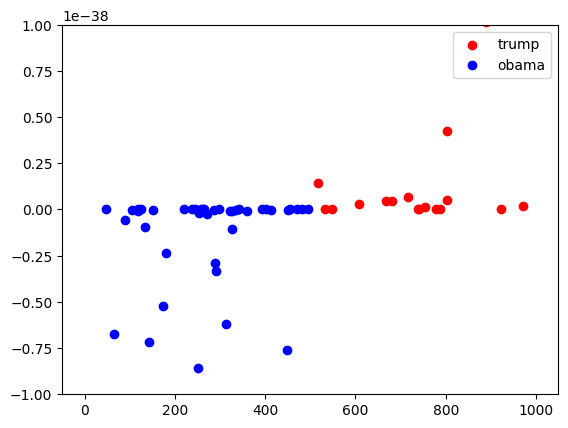

In [38]:
# Separate the dataframe into two dataframes, one for trump and one for obama
trump_df = dataframe[dataframe['speaker'] == 'trump']
obama_df = dataframe[dataframe['speaker'] == 'obama']
# Create a matplotlib scatterplot that shows score_val for each row for trump and obama where trump is red dots and obama is blue dots
plt.scatter(trump_df.index, trump_df['score_val'], c='red', label='trump')
plt.scatter(obama_df.index, obama_df['score_val'], c='blue', label='obama')
plt.legend()
# plot y range from -1 to 1
plt.ylim(-.00000000000000000000000000000000000001, .00000000000000000000000000000000000001)
plt.show()


In [39]:
# Append predictions to the test_df
dataframe['prediction'] = predictions
dataframe.head()

,text,speaker,score_val,prediction
0,recession marvins competitor closed dozen plan...,obama,-9.486168e-37,obama
1,rise fall journey one nation one people,obama,-2.945966e-23,obama
2,difference difference personal,obama,-2.593024e-12,obama
3,thats weve excluded lobbyist policymaking job ...,obama,-2.359174e-36,obama
4,recognize many still strong desire focus past,obama,-3.480274e-24,obama


In [16]:
model.accuracy(predictions=dataframe['prediction'], actual=dataframe['speaker'])

0.987

In [18]:
# Find number of words in the model vocabulary to find total number of features
# Create a new column that is binary trump vs obama where trump is 1 and obama is 0
dataframe['binary_speaker'] = [1 if speaker == 'trump' else 0 for speaker in dataframe['speaker']]
# Create a column that is the prediction column but trump is 1 and obama is 0
dataframe['binary_prediction'] = [1 if prediction == 'trump' else 0 for prediction in dataframe['prediction']]
model.metrics(y_true=dataframe['binary_speaker'], y_pred=dataframe['binary_prediction'])

{'accuracy': 0.987,
 'sensitivity': 0.996,
 'precision': 0.9783889980353635,
 'specificity': 0.978,
 'f1-score': 0.9871159563924677}

# C

In [16]:
knn_model = knn(k=5)

In [17]:
knn_model.train_on_df(df=dataframe, text_col='text', class_col='speaker', vectorizer='count')

In [18]:
knn_model.vocab

['abedini',
 'ability',
 'able',
 'abroad',
 'absolute',
 'absolutely',
 'absorbing',
 'accommodate',
 'accompanied',
 'according',
 'accountable',
 'accuracy',
 'accused',
 'achievable',
 'achieve',
 'achieved',
 'achievement',
 'acknowledge',
 'acquired',
 'acrimony',
 'across',
 'act',
 'action',
 'active',
 'activity',
 'actual',
 'actually',
 'ad',
 'add',
 'additional',
 'administration',
 'administrator',
 'admiration',
 'admission',
 'admit',
 'adopt',
 'advance',
 'advanced',
 'advancing',
 'advantage',
 'adversary',
 'advice',
 'affect',
 'affection',
 'affiliate',
 'afford',
 'affordable',
 'affront',
 'afghan',
 'afghanistan',
 'afraid',
 'africa',
 'africato',
 'age',
 'agency',
 'aggression',
 'aggressively',
 'ago',
 'agree',
 'agreed',
 'agreement',
 'agrees',
 'ahead',
 'air',
 'airline',
 'airman',
 'airplane',
 'aisle',
 'al',
 'alabama',
 'alexander',
 'alive',
 'allen',
 'alliance',
 'allow',
 'allowed',
 'allowing',
 'allows',
 'ally',
 'almost',
 'alone',
 'along

In [19]:
knn_model.training_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
test_array, test_classes = knn_model.vectorize_df(df=dataframe, text_col='text', class_col='speaker', vectorizer='count')

In [21]:
predictions = knn_model.predict(test_array=test_array)



In [22]:
# Lets determine the accuracy of the model
# Lets get the number of correct predictions
np.sum(predictions == test_classes) / len(predictions)

0.608

In [23]:
# Lets try that TFIDF vectorizer
knn_tfidf_model = knn(k=5)
knn_tfidf_model.train_on_df(df=dataframe, text_col='text', class_col='speaker', vectorizer='tfidf')
test_array, test_classes = knn_tfidf_model.vectorize_df(df=dataframe, text_col='text', class_col='speaker', vectorizer='tfidf', type='test')

In [29]:
tfidf_predictions_euclid = knn_tfidf_model.predict(test_array=test_array)
tfidf_predictions_cosine = knn_tfidf_model.predict(test_array=test_array, distance_type='cosine')
tfidf_predictions_manhattan = knn_tfidf_model.predict(test_array=test_array, distance_type='manhattan')

In [31]:

print(np.sum(tfidf_predictions_euclid == test_classes) / len(predictions))
print(np.sum(tfidf_predictions_cosine == test_classes) / len(predictions))
print(np.sum(tfidf_predictions_manhattan == test_classes) / len(predictions))

0.659
0.5
0.579


In [34]:
k_values = [ 3, 5, 7, 9, 11, 13, 15, 21, 25, 31]
accuracy = []
for k in k_values:
    knn_tfidf_model.k = k
    model_predictions = knn_tfidf_model.predict(test_array=test_array)
    accuracy.append(np.sum(model_predictions == test_classes) / len(model_predictions))
    print('Done with k = {}'.format(k))

Done with k = 3
Done with k = 5
Done with k = 7
Done with k = 9
Done with k = 11
Done with k = 13
Done with k = 15
Done with k = 21
Done with k = 25
Done with k = 31


In [35]:
accuracy

[0.834, 0.659, 0.558, 0.515, 0.508, 0.501, 0.5, 0.5, 0.5, 0.5]

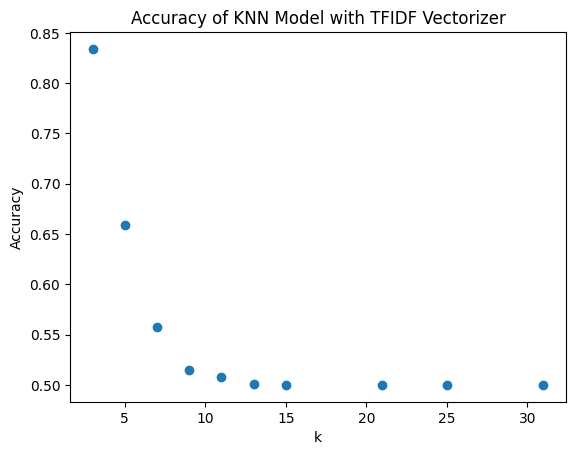

In [38]:
# Create a matplotlib scatterplot of k_values on the x-axis and accuracy on the y-axis
plt.scatter(k_values, accuracy)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy of KNN Model with TFIDF Vectorizer')
plt.show()

In [19]:
knn_tfidf_final_model = knn(k=3)
knn_tfidf_final_model.train_on_df(df=dataframe, text_col='text', class_col='speaker', vectorizer='tfidf')

In [22]:
test_array, test_classes = knn_tfidf_final_model.vectorize_df(df=dataframe, text_col='text', class_col='speaker', vectorizer='tfidf', type='test')

In [23]:
predictions = knn_tfidf_final_model.predict(test_array=test_array)

In [24]:
# add a new knn_prediction column to the dataframe
dataframe['knn_prediction'] = predictions
# Create binary version of knn_prediction
dataframe['binary_knn_prediction'] = [1 if prediction == 'trump' else 0 for prediction in dataframe['knn_prediction']]
# Metrics for knn model
model.metrics(y_true=dataframe['binary_speaker'], y_pred=dataframe['binary_knn_prediction'])

{'accuracy': 0.834,
 'sensitivity': 0.95,
 'precision': 0.7711038961038961,
 'specificity': 0.718,
 'f1-score': 0.8512544802867382}